In [34]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from keras.preprocessing import image                  
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from sklearn.metrics import f1_score
import pandas as pd
from keras.models import load_model
from PIL import ImageFile     
import cv2
import os
import math 
import pytube
import time

youtubeURL = 'www.youtube.com/watch?v=A-7pvdaZEkI'

# You probably need 
def url_to_folder(input_url, destination_folder):

    # This could return a RegexMatchError or VideoUnavalibleError

    yt = pytube.YouTube(input_url)
    file_name = 'vid'+str(math.floor(time.time()))

    print("Found video: ", yt.title)

    if not os.path.isdir(destination_folder):
        os.mkdir(destination_folder)
    
    s = yt.streams.filter(progressive=True, file_extension='mp4').first()
    print("Starting download")
    s.download(destination_folder, file_name)
    
    return destination_folder+file_name+'.mp4'

def extractFrames(pathIn, pathOut):

    if not os.path.isdir(pathOut):
        os.mkdir(pathOut)

    dataDirectory = pathOut + '/' + str(math.floor(time.time())) + '/'
    os.mkdir(dataDirectory)

 
    cap = cv2.VideoCapture(pathIn)
    count = 0


    while (cap.isOpened()):
 
        # Capture frame-by-frame
        frame_rate = cap.get(5)
        ret, frame = cap.read()
 
        if ret == True:
            frameId = cap.get(1)
            if (frameId % math.floor(frame_rate) == 0):
                cv2.imwrite(os.path.join(dataDirectory, "frame{:d}.jpg".format(count)), frame)  # save frame as JPEG file
                count += 1
        else:
            break
 
    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()
    print('Frames read: ', count)
    return dataDirectory
 

returnedFile = url_to_folder(youtubeURL,'/home/aashinshazar/beta/cookiesinthejar/videos/')
print (returnedFile)
data_dir = extractFrames(returnedFile, '/home/aashinshazar/beta/cookiesinthejar/videos/data')
print(data_dir)

# define function to load train, test, and validation datasets
def load_dataset(path):
    part_files = np.array(sorted(glob(path + "*.jpg")))
    return part_files

# load train, test, and validation datasets
unseen_files = load_dataset(data_dir)

print('There are %d unseen part images.' % len(unseen_files))

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)
   
ImageFile.LOAD_TRUNCATED_IMAGES = True        

# pre-process the data for Keras
unseen_tensors = paths_to_tensor(unseen_files).astype('float32')/255

model = load_model('/home/aashinshazar/finalModelwAugSlight.hdf5')

# get index of predicted part for each image in the test image set
part_predictions = [(model.predict(np.expand_dims(tensor, axis=0))) for tensor in unseen_tensors]
print ("Done!")

Found video:  Usain Bolt - Fastest Man On Earth [HD]
Starting download
/home/aashinshazar/beta/cookiesinthejar/videos/vid1551645352.mp4


 13%|█▎        | 18/134 [00:00<00:00, 175.95it/s]

Frames read:  134
/home/aashinshazar/beta/cookiesinthejar/videos/data/1551645353/
There are 134 unseen part images.


100%|██████████| 134/134 [00:00<00:00, 183.82it/s]


Done!


[[3.346144e-05 9.998696e-01]]
[[1.5813798e-04 9.9945337e-01]]
[[8.4277735e-06 9.9996710e-01]]
[[4.9357317e-05 9.9980158e-01]]
[[2.5383335e-05 9.9993491e-01]]
[[1.0875867e-04 9.9969244e-01]]
[[4.5836452e-05 9.9988186e-01]]
[[1.8794930e-05 9.9994266e-01]]
[[2.689276e-04 9.993930e-01]]
[[0.00186945 0.99430275]]
[[0.00543485 0.99008536]]
[[2.9718591e-04 9.9940014e-01]]
[[2.3048959e-04 9.9926692e-01]]
[[0.00133552 0.99630547]]
[[5.035189e-04 9.976804e-01]]
[[2.8065775e-04 9.9883443e-01]]
[[2.8667692e-04 9.9909818e-01]]
[[0.00383581 0.99448746]]
[[3.124667e-05 9.999361e-01]]
[[5.029028e-04 9.992987e-01]]
[[0.00357946 0.9943271 ]]
[[6.9299195e-04 9.9841321e-01]]
[[0.0033815  0.99343854]]
[[0.00307959 0.99345124]]


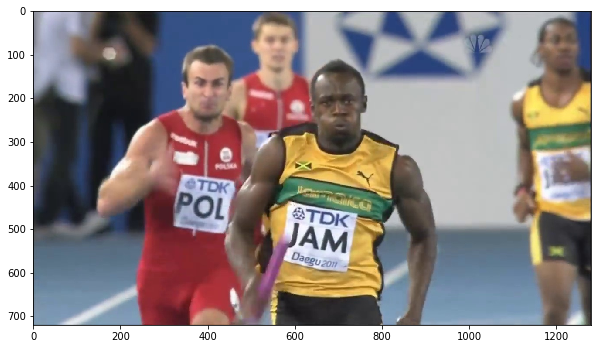

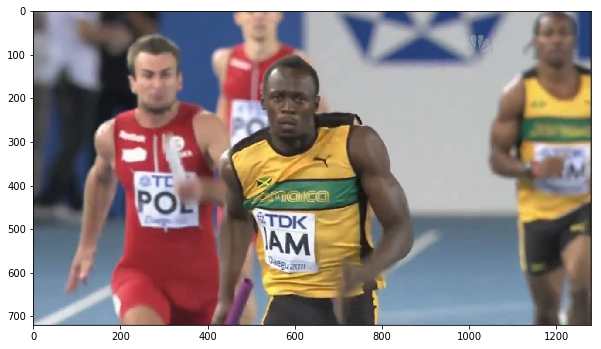

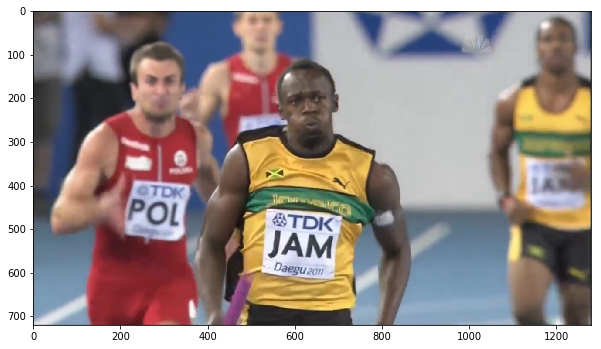

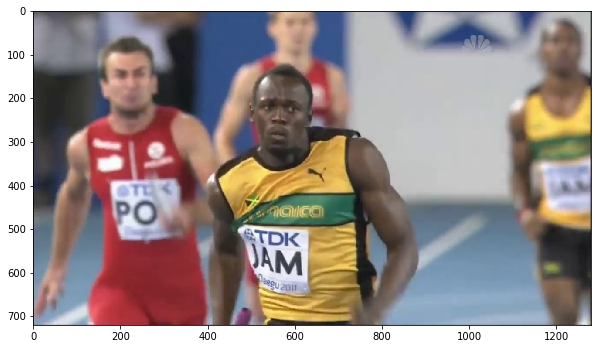

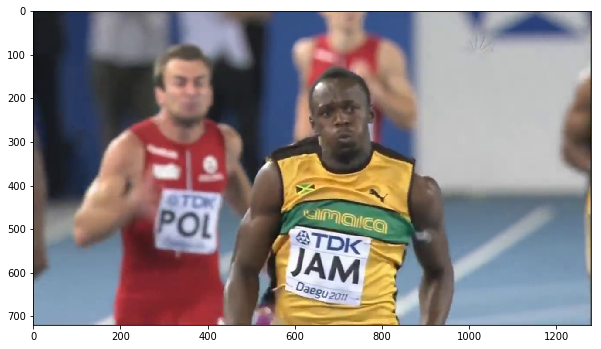

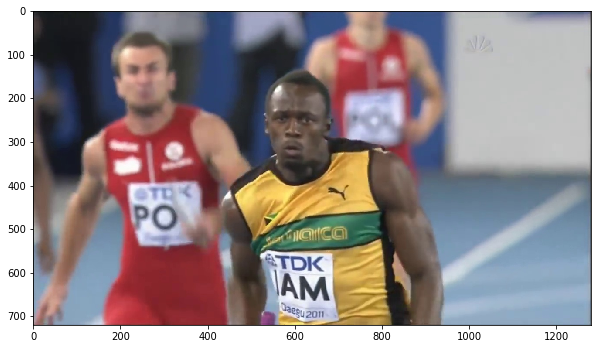

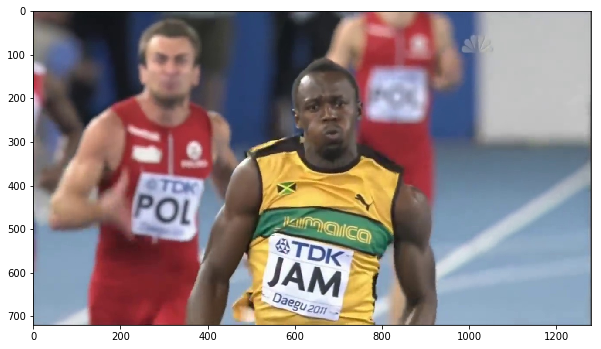

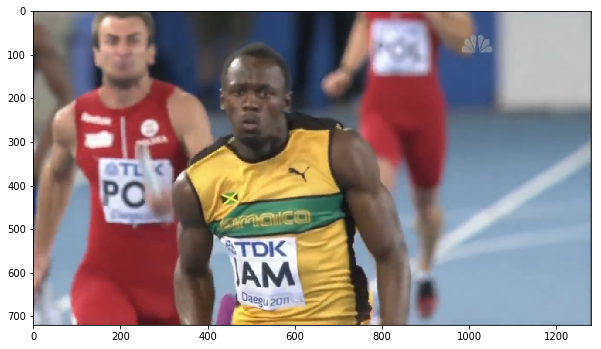

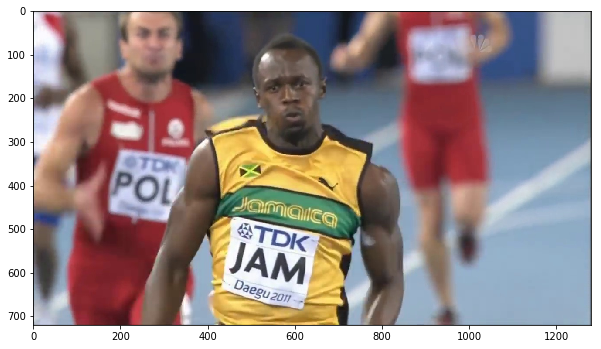

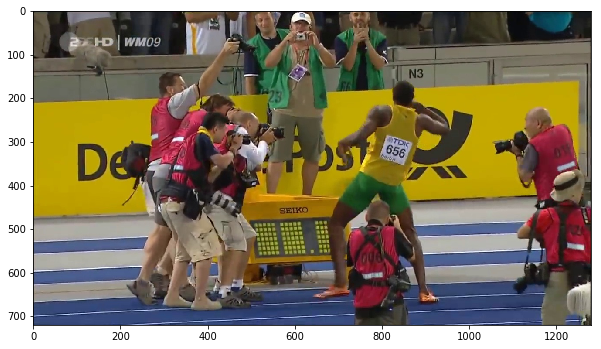

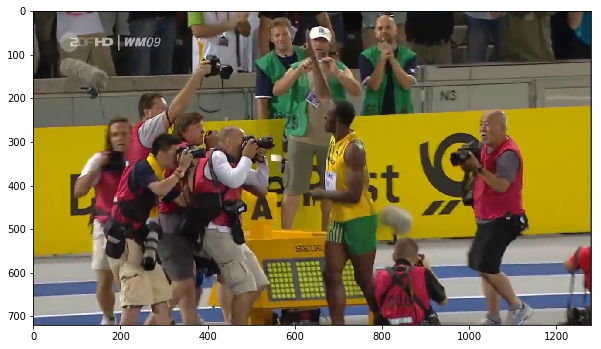

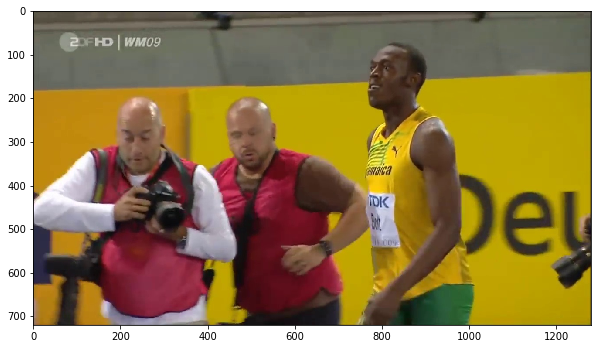

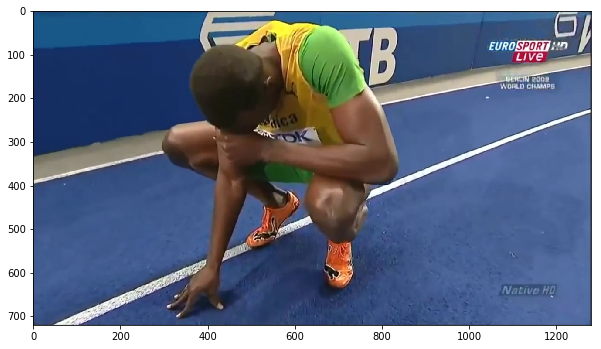

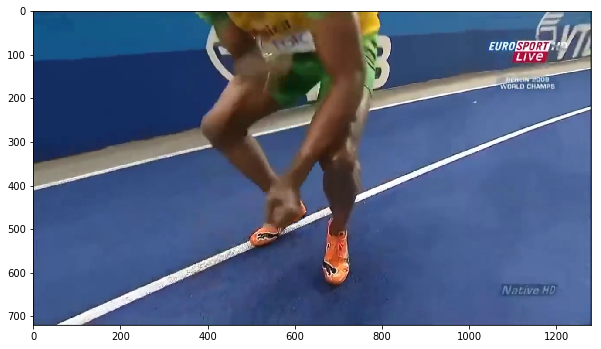

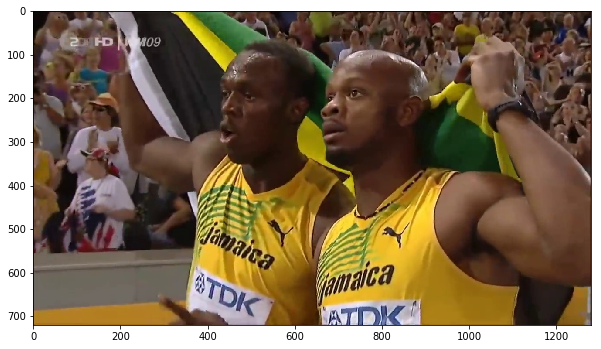

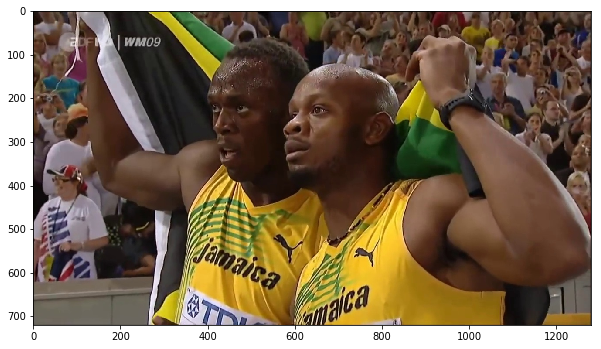

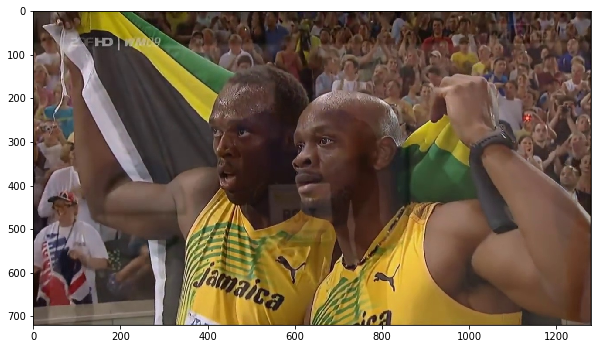

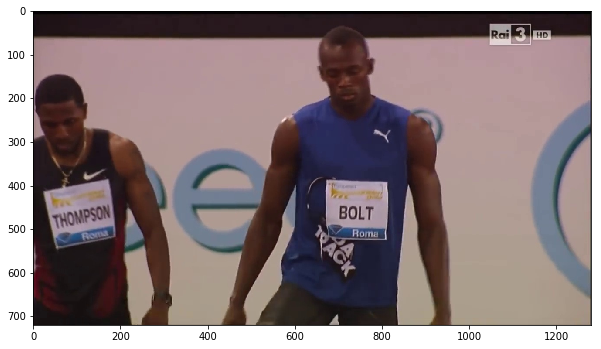

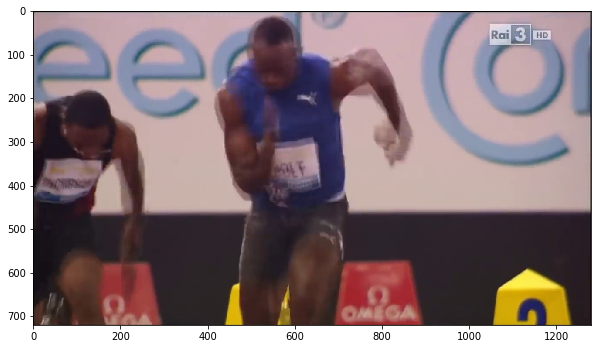

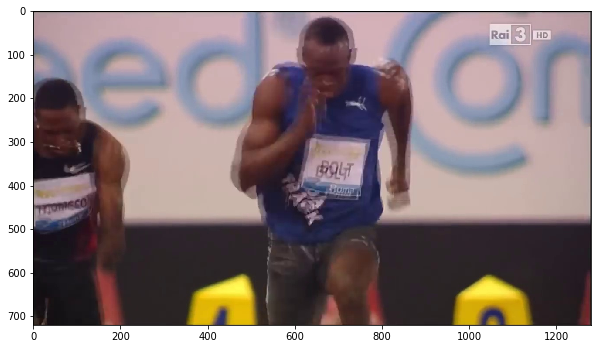

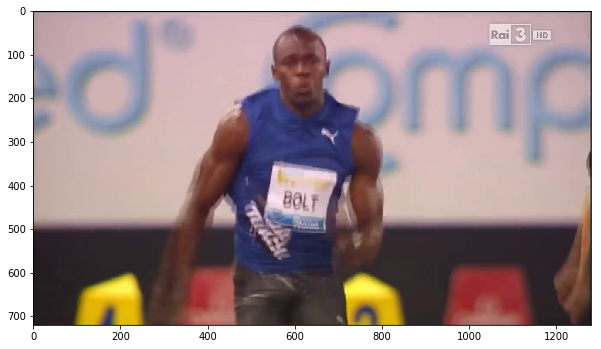

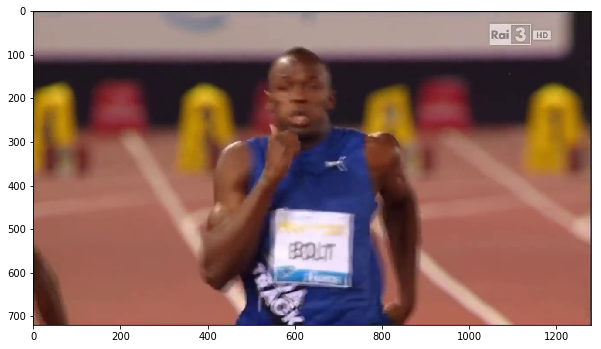

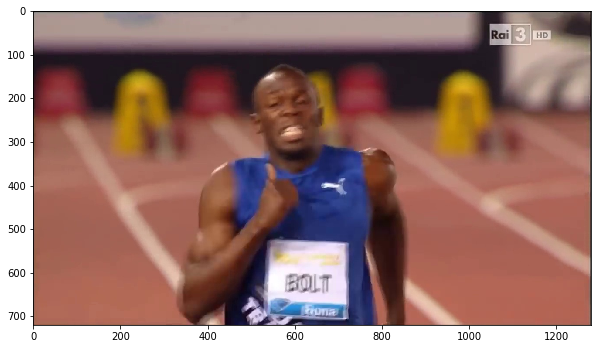

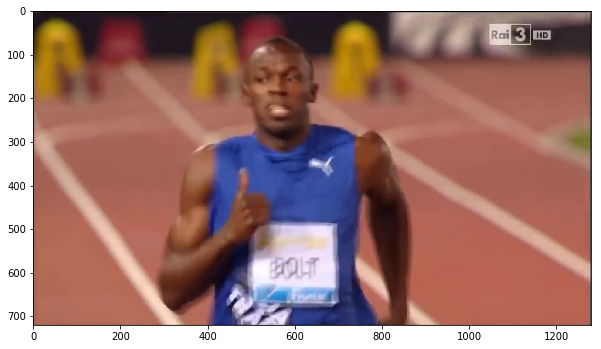

In [36]:
for x in range (0, len(unseen_files)):
    if (((part_predictions[x])[0])[1]) > 0.99:
        print (part_predictions[x])
        img= mpimg.imread(unseen_files[x])
        plt.figure(figsize=(10,10))
        plt.imshow(img)